In [12]:
import torch
import tools as tl

In [4]:
data_dir = tl.download_extract('aclImdb', 'aclImdb')

In [5]:
train_data = tl.read_imdb(data_dir, is_train=True)
print('训练集数目：', len(train_data[0]))
for x, y in zip(train_data[0][:3], train_data[1][:3]):
    print('标签：', y, 'review:', x[0:60])


训练集数目： 1
标签： 0 review: This is one of the dumbest films, I've ever seen. It rips of


In [10]:
train_tokens = tl.tokenize(train_data[0], token='word')
vocab = tl.Vocab(train_tokens, min_freq=5, reserved_tokens=['<pad>'])

(array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.,
        550., 600., 650., 700., 750., 800., 850., 900., 950.]),
 <BarContainer object of 19 artists>)

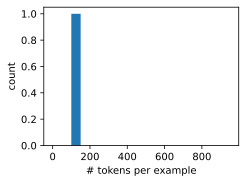

In [11]:
tl.set_figsize()
tl.plt.xlabel('# tokens per example')
tl.plt.ylabel('count')
tl.plt.hist([len(line) for line in train_tokens], bins=range(0, 1000, 50))

In [8]:
num_steps = 500
train_features = torch.tensor([tl.truncate_pad(vocab[line], num_steps, vocab['<pad>']) for line in train_tokens])
print(train_features.shape)

torch.Size([1, 500])


In [9]:
train_iter = tl.load_array((train_features, torch.tensor(train_data[1])), 64)
for X, y in train_iter:
    print('X', X.shape, 'y', y.shape)
    break
print('# batches:', len(train_iter))

X torch.Size([1, 500]) y torch.Size([1])
# batches: 1
